In [111]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go



In [112]:
# load csv's into dataframes
job_patterns_df = pd.read_csv('CountByStateAndGeneralIndustry(State-NAC2).csv')

In [113]:
# renaming columns for clearer labels
job_patterns_df = job_patterns_df.rename(columns={'nac2Label': 'Industry', 'year': 'Year'})
job_patterns_df = job_patterns_df.dropna(how='any',axis=0) 

job_patterns_df.head()


,State,Industry,NAC2,Year,totBus/StInd,totExec/StInd,totProf/StInd,totTech/StInd,totSales/StInd,totAdmin/StInd,...,biracialFemaleProfessional,biracialFemaleTechnician,biracialFemaleSalesWorker,biracialFemaleAdminSupport,biracialFemaleCraftWorkers,biracialFemaleOperative,biracialFemaleLaborer,biracialFemaleServiceWorker,biracialFemaleEmployed,biracialFemaleMidOfficer
0,Alabama,Accommodation and Food Services,72,2011,336,282,203,40,158,512,...,2,0,0,4,0,1,5,169,189,7
1,Alabama,Administrative and Support and Waste Managemen...,56,2011,191,350,1065,573,698,4168,...,7,5,3,45,0,19,8,34,126,4
2,Alabama,"Agriculture, Forestry, Fishing and Hunting",11,2011,25,74,248,185,119,338,...,0,0,0,0,0,1,6,0,7,0
3,Alabama,"Arts, Entertainment, and Recreation",71,2011,27,74,425,40,244,151,...,2,0,1,0,0,0,0,6,10,1
4,Alabama,Construction,23,2011,123,435,1505,647,224,1212,...,1,0,1,4,0,1,0,0,7,0


In [114]:
# drop any null values in dataframe
job_patterns_df = job_patterns_df.dropna(how='any',axis=1) 
#find outliers
from numpy import mean
from numpy import std

#job_patterns_df = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
#job_patterns_df[(np.abs(stats.zscore(job_patterns_df)) < 3).all(axis=1)]

In [129]:
# dataframe organized by state 
state_df = job_patterns_df.groupby(['State']).sum()
#state_df.head()

In [116]:
#Seaborn plot settings
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)                                                  
plt.figure(figsize=(3.1, 3))                                                                                                                                                                                                                                
color = sns.color_palette("Set2", 6)


<Figure size 223.2x216 with 0 Axes>

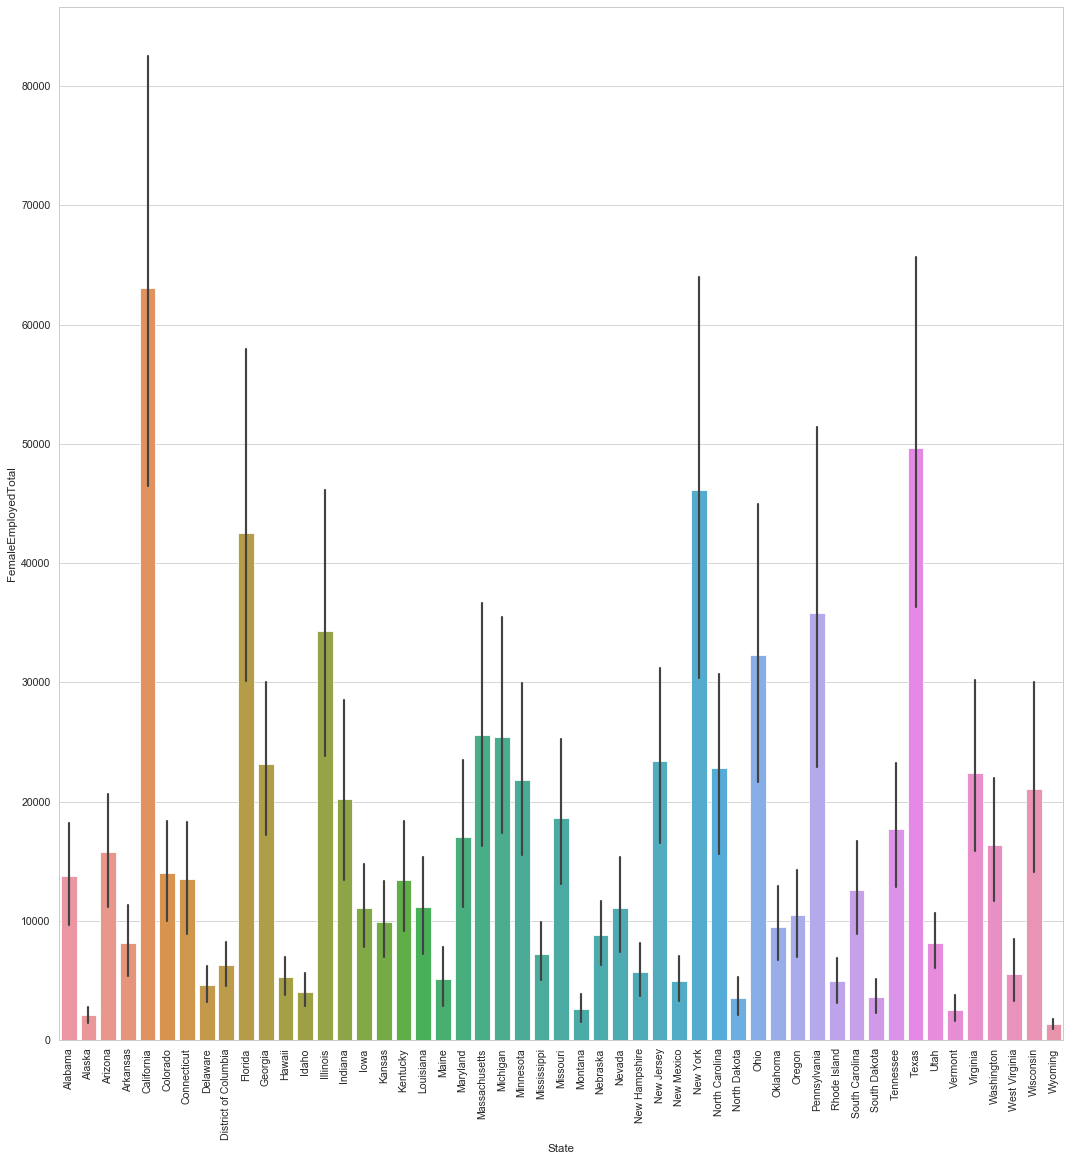

In [117]:
ax = sns.barplot(x="State", y="FemaleEmployedTotal", data=job_patterns_df)
for item in ax.get_xticklabels():
    item.set_rotation(90)

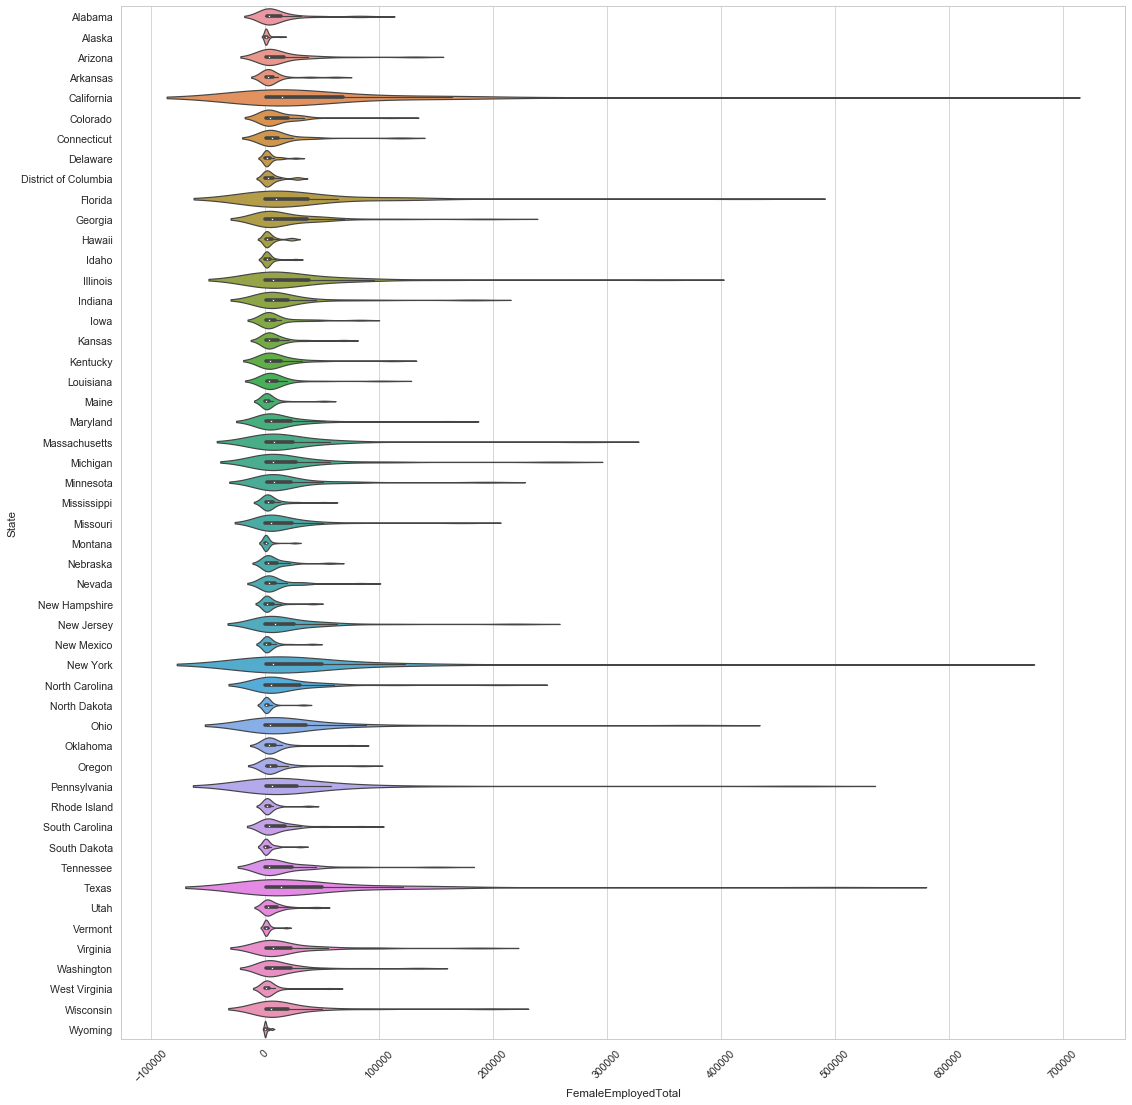

In [118]:
ax2 = sns.violinplot(x="FemaleEmployedTotal", y="State",
                    data=job_patterns_df, scale="width")
for item in ax2.get_xticklabels():
    item.set_rotation(45)

    
#sns.set(rc={'figure.figsize':(18,19)})


In [119]:
#male and female total workers across state

# United States Female Workers Heatmap

In [148]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(job_patterns_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                   # geojson="counties",
                    color="FemaleEmployedTotal",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Female Workers by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [122]:
# dataframe organized by industry
industry_df = job_patterns_df.groupby(['Industry']).sum()
industry_df.head()

,NAC2,Year,totBus/StInd,totExec/StInd,totProf/StInd,totTech/StInd,totSales/StInd,totAdmin/StInd,totCraft/StInd,totOp/StInd,...,biracialFemaleProfessional,biracialFemaleTechnician,biracialFemaleSalesWorker,biracialFemaleAdminSupport,biracialFemaleCraftWorkers,biracialFemaleOperative,biracialFemaleLaborer,biracialFemaleServiceWorker,biracialFemaleEmployed,biracialFemaleMidOfficer
Industry,,,,,,,,,,,,,,,,,,,,,
Accommodation and Food Services,14328,545690,174139,170393,298028,204034,431006,651524,350113,348387,...,2893,402,8047,16936,1338,3296,6712,231646,285385,13112
Administrative and Support and Waste Management and Remediation Services,10920,537624,87072,258944,2044876,620666,699406,2262617,678940,1089026,...,48181,3851,9885,68255,1103,5865,24801,62539,233907,8343
"Agriculture, Forestry, Fishing and Hunting",1287,348183,6105,20640,61444,26298,33911,55026,54862,159080,...,202,73,177,399,8,322,2588,118,4095,161
"Arts, Entertainment, and Recreation",10011,430726,18996,68691,502050,150260,258920,347239,237150,219680,...,5593,630,4570,6478,1621,1186,2127,35555,60950,2858
Construction,3726,475098,47898,177804,640266,239490,167524,420071,2274728,588720,...,2365,332,1113,5849,1485,355,1418,272,14610,1242


In [140]:
# dataframe organized by industry within state 
industry_in_df = job_patterns_df.groupby(['State', 'NAC2']).sum()
industry_in_df

Year  totBus/StInd  totExec/StInd  totProf/StInd  totTech/StInd  \
State   NAC2                                                                    
Alabama 11    8050            93            273           1101            780   
        21    8050            90            458           2001            345   
        22    8050           213            669           9961           2499   
        23    8050           470           1813           5887           2416   
        31    8050          1567           4289          32667          15904   
...            ...           ...            ...            ...            ...   
Wyoming 55    4027             9             13            217             82   
        56    4027            16             17             58             28   
        62    4027            98            223           5128           2104   
        71    4027             6             45            176             29   
        72    4027            96             78             74             43   

              totSales/StInd  totAdmin/StInd  totCraft/StInd  totOp/StInd  \
State   NAC2                                                                
Alabama 11               349            1218            1605         4432   
        21                46            1470            5538         7553   
        22               187            6545           10695         4443   
        23               760            4495           32889         7837   
        31              8184           19173           59031       162444   
...                      ...             ...             ...          ...   
Wyoming 55                 0              53             338          283   
        56                11              83             257           43   
        62                13            1904             144           87   
        71               210              91              90           83   
        72               406             557             269          162   

              totLabor/StInd  ...  biracialFemaleProfessional  \
State   NAC2                  ...                               
Alabama 11             19675  ...                           0   
        21              1593  ...                           1   
        22               964  ...                           5   
        23             14386  ...                           7   
        31             74622  ...                          44   
...                      ...  ...                         ...   
Wyoming 55                38  ...                           0   
        56                47  ...                           0   
        62               490  ...                          22   
        71               126  ...                           3   
        72               268  ...                           0   

              biracialFemaleTechnician  biracialFemaleSalesWorker  \
State   NAC2                                                        
Alabama 11                           2                          3   
        21                           0                          0   
        22                           0                          0   
        23                           0                          1   
        31                          21                          3   
...                                ...                        ...   
Wyoming 55                           0                          0   
        56                           0                          0   
        62                          20                          0   
        71                           0                          0   
        72                           0                          3   

              biracialFemaleAdminSupport  biracialFemaleCraftWorkers  \
State   NAC2                                                           
Alabama 11                             5                           0  

# Wage Gap Between Female and Male Workers

In [23]:
df = pd.read_csv('inc_occ_gender.csv')
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...,...
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [24]:
#Checking for null values in each column
df = df[df["M_weekly"]!="Na"]
df = df.reset_index()

df = df[df.M_workers != 'Na']
df = df[df.F_workers != 'Na']
df = df[df.All_weekly != 'Na']
df = df[df.M_weekly != 'Na']
df = df[df.F_weekly != 'Na']
df.shape


/Users/anjali/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(142, 8)

In [25]:
df['M_weekly'] = pd.to_numeric(df['M_weekly'])
df['F_weekly'] = pd.to_numeric(df['F_weekly'])

In [26]:
df=df.assign(weekly_gap=(df['M_weekly'] - df['F_weekly']))
df

,index,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,weekly_gap
0,0,ALL OCCUPATIONS,109080,809,60746,895,48334,726,169
1,1,MANAGEMENT,12480,1351,7332,1486,5147,1139,347
2,2,Chief executives,1046,2041,763,2251,283,1836,415
3,3,General and operations managers,823,1260,621,1347,202,1002,345
4,6,Marketing and sales managers,948,1462,570,1603,378,1258,345
...,...,...,...,...,...,...,...,...,...
218,521,TRANSPORTATION,6953,646,5998,679,955,494,185
221,527,Bus drivers,323,615,184,681,138,572,109
222,528,Driver/sales workers and truck drivers,2687,747,2582,751,105,632,119
229,550,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455,92


Text(0, 0.5, 'Weekly Median Income')

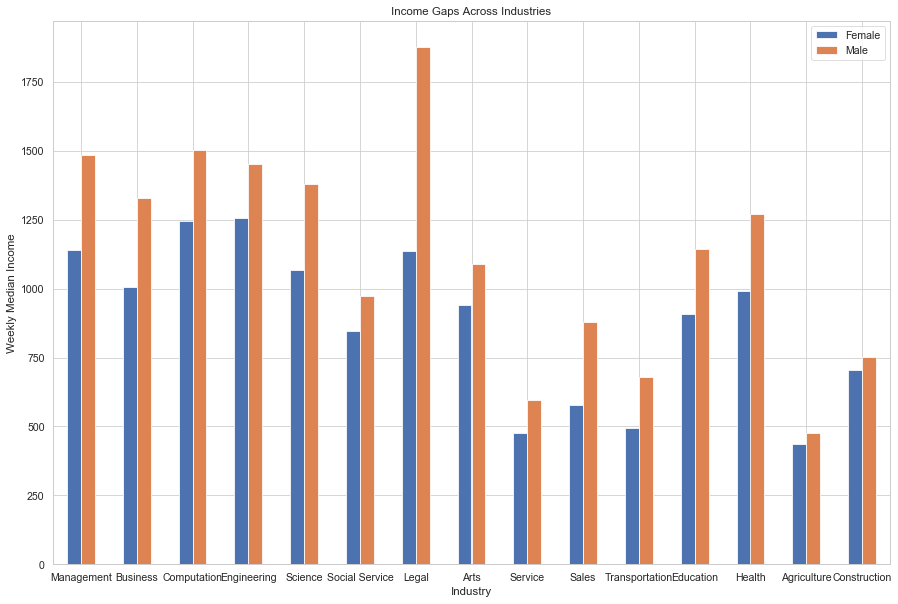

In [101]:
# bar graph for income comparision between differnt major occupations

F_weekly = [1139,1004, 1245, 1257, 1067, 845, 1135, 942, 475, 578, 494, 907, 991, 437, 704]
M_weekly = [1486, 1327, 1503, 1452, 1379, 973, 1877, 1088, 597, 880, 679, 1144, 1272, 477, 751]
index = ['Management', 'Business', 'Computation','Engineering', 'Science', 'Social Service',
          'Legal', 'Arts', 'Service', 'Sales', 'Transportation', 'Education', 'Health', 
         'Agriculture', 'Construction']
df = pd.DataFrame({'Female': F_weekly, 'Male': M_weekly }, index=index)
ax = df.plot.bar(rot=0, title='Income Gaps Across Industries',figsize = (15,10))
ax.set_xlabel('Industry')
ax.set_ylabel('Weekly Median Income')

Text(0, 0.5, 'Manager Job Type')

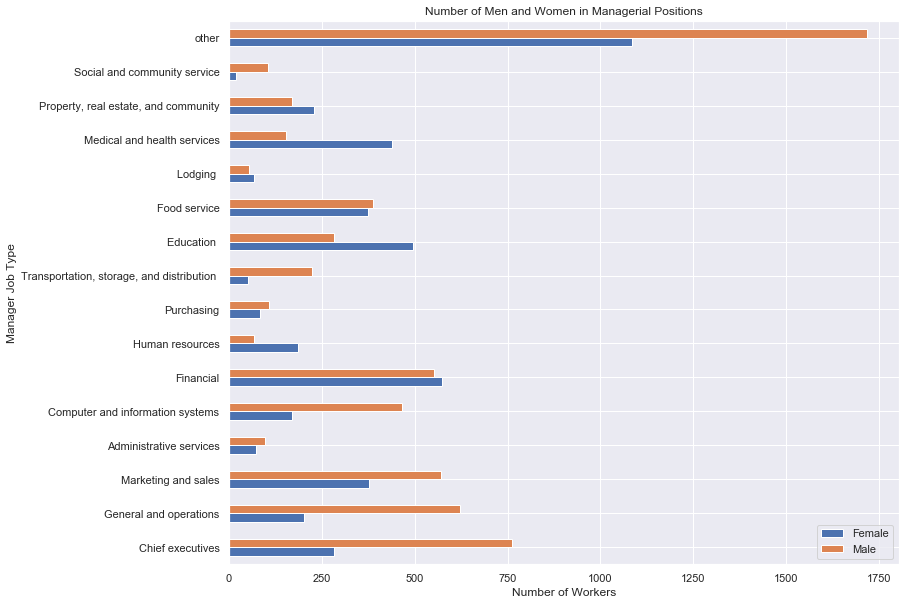

In [67]:
# Bar graph for amount of male and female workers in management jobs
M_workers = [763, 621, 570, 96, 466, 551, 68, 109, 224, 282, 389, 54, 154, 171, 105, 1717]
W_workers = [283, 202, 378, 73, 169, 573, 186, 84, 52, 496, 374, 68, 438, 230, 20, 1085]
index = ['Chief executives', 'General and operations', 'Marketing and sales',
         'Administrative services', 'Computer and information systems', 'Financial', 'Human resources', 'Purchasing',
         'Transportation, storage, and distribution ','Education ','Food service','Lodging ','Medical and health services','Property, real estate, and community','Social and community service','other']
df = pd.DataFrame({'Female': W_workers,
                   'Male': M_workers}, index=index)
ax = df.plot.barh(rot=0, figsize=(12,10),title = 'Number of Men and Women in Managerial Positions')
ax.set_xlabel("Number of Workers")
ax.set_ylabel("Manager Job Type")


Text(0, 0.5, 'Industry')

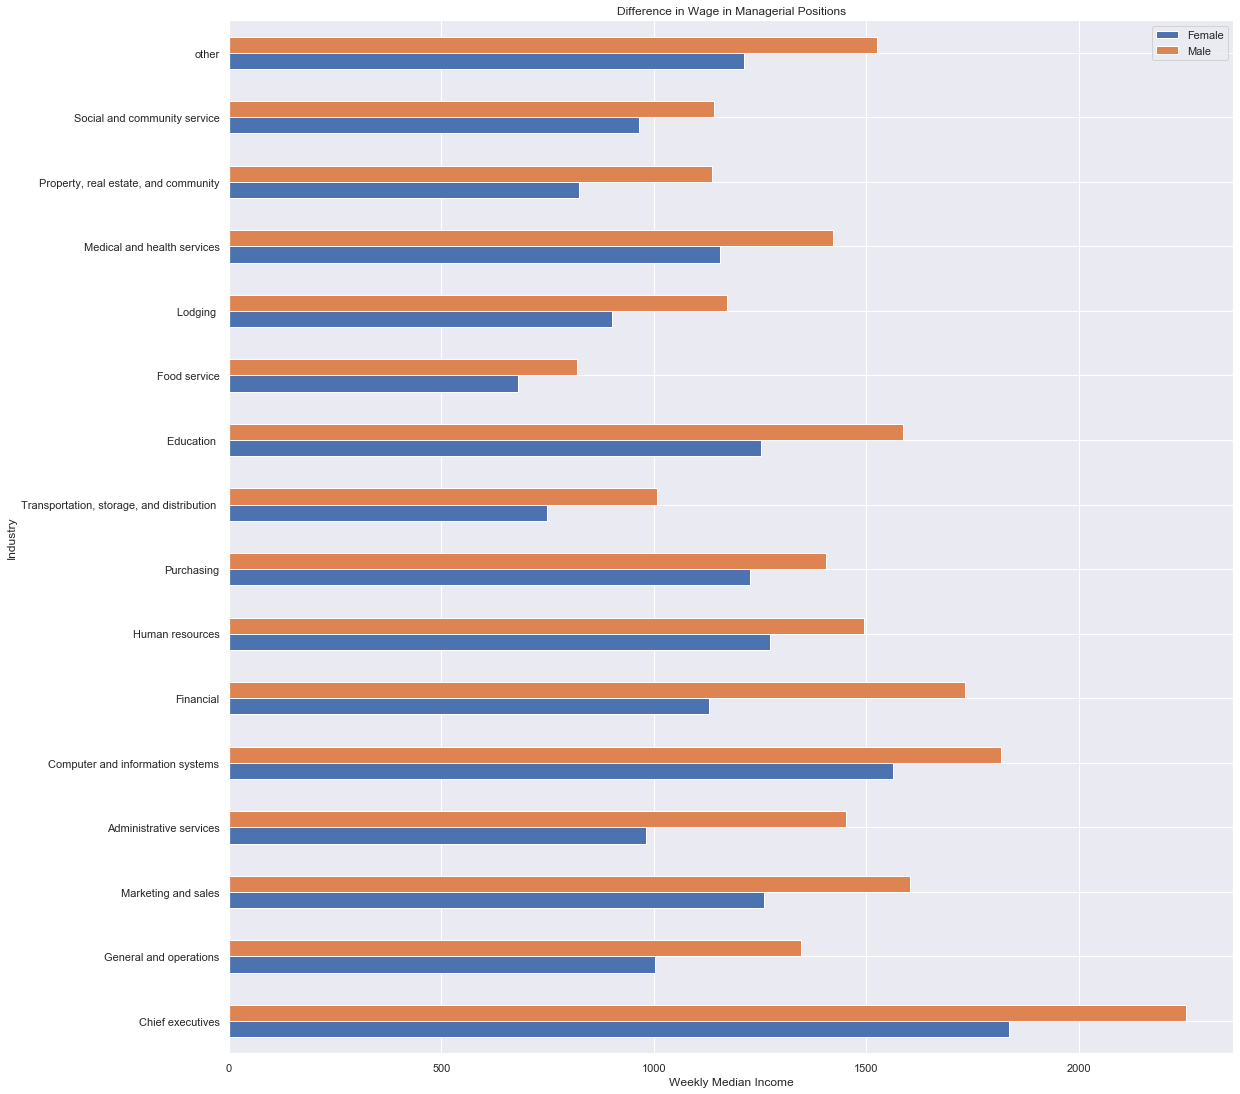

In [65]:
#bar graph of income gap of male and female workers in managerial positions
F_weekly = [1836,1002,1258,981,1563,1130,1274,1226,749,1252,680,902,1156,823,965,1213]
M_weekly = [2251,1347,1603,1451,1817,1732,1495,1404,1006,1585,820,1171,1422,1137,1142,1525]
index = ['Chief executives', 'General and operations', 'Marketing and sales',
         'Administrative services', 'Computer and information systems', 'Financial', 'Human resources', 'Purchasing','Transportation, storage, and distribution ','Education ','Food service','Lodging ',
         'Medical and health services','Property, real estate, and community','Social and community service','other']
df = pd.DataFrame({'Female': F_weekly, 'Male': M_weekly }, index=index)
ax = df.plot.barh(rot=0, title = 'Difference in Wage in Managerial Positions', figsize = (18,19))            
ax.set_xlabel('Weekly Median Income')
ax.set_ylabel('Industry')

Text(0, 0.5, 'Weeky Median Income Gap in Dollars')

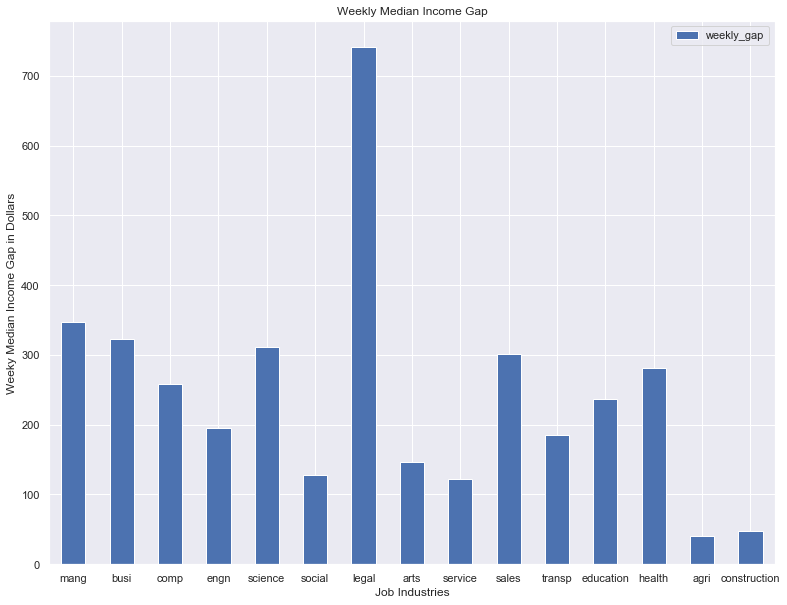

In [66]:
weekly_gap = [347, 323, 258, 195, 312, 128, 742, 146, 122, 302, 185, 237, 281, 40, 47]
index = ['mang', 'busi', 'comp', 'engn', 'science', 'social','legal', 'arts', 
         'service', 'sales', 'transp', 'education', 'health', 
         'agri', 'construction']
df = pd.DataFrame({'weekly_gap':weekly_gap}, index=index)
ax =df.plot.bar(rot=0, title = 'Weekly Median Income Gap', figsize = (13,10))
ax.set_xlabel("Job Industries")
ax.set_ylabel("Weeky Median Income Gap in Dollars")